In [487]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [488]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns

from sklearn.preprocessing import StandardScaler

# Big dataset

In [489]:
data_big = pd.read_csv('../../MA_PREDICTOR/data/ma_data_car_clean.csv')

In [335]:
# Scale numerical features
scaler = StandardScaler()
data_big.acquisition_count = scaler.fit_transform(data_big[['acquisition_count']])
data_big.bidder_count = scaler.fit_transform(data_big[['bidder_count']])

## CAR_1 (model_big_1)

In [336]:
# Removing outliers
car_1_big = data_big[abs(data_big.car_1) <= 0.3]

In [469]:
model_big_1 = smf.ols(
    formula='car_1 ~ C(consideration_offered) + C(shares_acquired) + C(shares_at_announcement) + C(target_status) + acquisition_count + bidder_count + month + C(cross_border) + C(relatedness) + C(economic_sector_ac) + C(business_sector_ac) + C(economic_sector_target) + C(business_sector_target)',
    data=car_1_big
).fit()

model_big_1.rsquared

0.009770656729491511

In [339]:
p_values = model_big_1.pvalues
p_values[p_values < 0.05]

Intercept                                                   0.011664
C(consideration_offered)[T.Other]                           0.000386
C(target_status)[T.public]                                  0.003009
C(cross_border)[T.national]                                 0.000077
C(economic_sector_ac)[T.Consumer Non-Cyclicals]             0.015069
C(economic_sector_ac)[T.Energy]                             0.013012
C(economic_sector_ac)[T.Healthcare]                         0.036341
C(economic_sector_ac)[T.Real Estate]                        0.019187
C(business_sector_ac)[T.Automobiles & Auto Parts]           0.010573
C(business_sector_ac)[T.Collective Investments]             0.000260
C(business_sector_ac)[T.Food & Drug Retailing]              0.020569
C(business_sector_ac)[T.Healthcare Services & Equipment]    0.021901
C(business_sector_ac)[T.Industrial Goods]                   0.011957
C(business_sector_ac)[T.Insurance]                          0.000389
C(business_sector_ac)[T.Investment

In [340]:
p_values[p_values < 0.01]

C(consideration_offered)[T.Other]                        0.000386
C(target_status)[T.public]                               0.003009
C(cross_border)[T.national]                              0.000077
C(business_sector_ac)[T.Collective Investments]          0.000260
C(business_sector_ac)[T.Insurance]                       0.000389
C(business_sector_ac)[T.Investment Holding Companies]    0.000054
C(business_sector_target)[T.Energy - Fossil Fuels]       0.001451
C(business_sector_target)[T.Renewable Energy]            0.008670
C(business_sector_target)[T.Uranium]                     0.000430
dtype: float64

## CAR_3 (model_big_3)

In [341]:
# Removing outliers
car_3_big = data_big[abs(data_big.car_3) <= 0.3]

In [342]:
model_big_3 = smf.ols(
    formula='car_3 ~ C(consideration_offered) + C(shares_acquired) + C(shares_at_announcement) + C(target_status) + acquisition_count + bidder_count + month + C(cross_border) + C(relatedness) + C(economic_sector_ac) + C(business_sector_ac) + C(economic_sector_target) + C(business_sector_target)',
    data=car_3_big
).fit()

In [343]:
model_big_3.rsquared

0.007731770764825452

In [344]:
p_values = model_big_3.pvalues
p_values[p_values < 0.05]

C(consideration_offered)[T.Other]                                          0.000374
C(target_status)[T.public]                                                 0.002587
C(cross_border)[T.national]                                                0.041509
C(business_sector_ac)[T.Automobiles & Auto Parts]                          0.000824
C(business_sector_ac)[T.Food & Drug Retailing]                             0.006090
C(economic_sector_target)[T.Institutions, Associations & Organizations]    0.003107
C(business_sector_target)[T.Automobiles & Auto Parts]                      0.008245
C(business_sector_target)[T.Institutions, Associations & Organizations]    0.003107
C(business_sector_target)[T.Renewable Energy]                              0.044479
C(business_sector_target)[T.Uranium]                                       0.016475
dtype: float64

In [345]:
p_values[p_values < 0.01]

C(consideration_offered)[T.Other]                                          0.000374
C(target_status)[T.public]                                                 0.002587
C(business_sector_ac)[T.Automobiles & Auto Parts]                          0.000824
C(business_sector_ac)[T.Food & Drug Retailing]                             0.006090
C(economic_sector_target)[T.Institutions, Associations & Organizations]    0.003107
C(business_sector_target)[T.Automobiles & Auto Parts]                      0.008245
C(business_sector_target)[T.Institutions, Associations & Organizations]    0.003107
dtype: float64

## CAR_10 (model_big_10)

In [346]:
# Removing outliers
car_10_big = data_big[abs(data_big.car_10) <= 0.3]

In [347]:
model_big_10 = smf.ols(
    formula='car_10 ~ C(consideration_offered) + C(shares_acquired) + C(shares_at_announcement) + C(target_status) + acquisition_count + bidder_count + month + C(cross_border) + C(relatedness) + C(economic_sector_ac) + C(business_sector_ac) + C(economic_sector_target) + C(business_sector_target)',
    data=car_10_big
).fit()

In [348]:
model_big_10.rsquared

0.006905564054514479

In [349]:
p_values = model_big_10.pvalues
p_values[p_values < 0.05]

C(consideration_offered)[T.Other]                                          0.004726
C(target_status)[T.public]                                                 0.008982
C(business_sector_ac)[T.Automobiles & Auto Parts]                          0.024683
C(economic_sector_target)[T.Institutions, Associations & Organizations]    0.014383
C(business_sector_target)[T.Institutions, Associations & Organizations]    0.014383
dtype: float64

In [350]:
p_values[p_values < 0.01]

C(consideration_offered)[T.Other]    0.004726
C(target_status)[T.public]           0.008982
dtype: float64

# Detailed dataset

In [431]:
data_detailed = pd.read_csv('../../MA_PREDICTOR/data/ma_detailed_data_car_clean.csv')

# Scale numerical features
num_features = ['acquisition_count', 'bidder_count']
for feature in num_features:
    scaler = StandardScaler()
    data_detailed[feature] = scaler.fit_transform(data_detailed[[feature]])

## CAR_1 (model_detailed_1)

In [432]:
# Removing outliers
car_1_detailed = data_detailed[abs(data_detailed.car_1) <= 0.3]

In [471]:
model_detailed_1 = smf.ols(
    formula='car_1 ~ C(target_status) + acquisition_count + C(shares_at_announcement) + C(shares_acquired) + C(consideration_offered) + bidder_count + month + rel_deal_value + C(cross_border) + C(relatedness) + C(economic_sector_ac) + C(business_sector_ac) + C(economic_sector_target) + C(business_sector_target) +C(cluster_category) + a_fin_adv_count + t_fin_adv_count',
    data=car_1_detailed
).fit()

In [434]:
model_detailed_1.rsquared

0.050633086315323594

In [435]:
p_values = model_detailed_1.pvalues
p_values[p_values < 0.05]

C(target_status)[T.public]                                           4.399287e-08
C(economic_sector_ac)[T.Basic Materials]                             4.649555e-03
C(economic_sector_ac)[T.Consumer Cyclicals]                          5.250733e-03
C(economic_sector_ac)[T.Consumer Non-Cyclicals]                      4.142325e-03
C(economic_sector_ac)[T.Energy]                                      1.944324e-02
C(economic_sector_ac)[T.Financials]                                  6.570075e-03
C(economic_sector_ac)[T.Healthcare]                                  1.442874e-02
C(economic_sector_ac)[T.Industrials]                                 5.803573e-03
C(economic_sector_ac)[T.Real Estate]                                 3.140390e-03
C(economic_sector_ac)[T.Technology]                                  3.046574e-03
C(economic_sector_ac)[T.Utilities]                                   8.921900e-03
C(business_sector_ac)[T.Automobiles & Auto Parts]                    5.194922e-04
C(business_secto

In [436]:
p_values[p_values < 0.01]

C(target_status)[T.public]                                  4.399287e-08
C(economic_sector_ac)[T.Basic Materials]                    4.649555e-03
C(economic_sector_ac)[T.Consumer Cyclicals]                 5.250733e-03
C(economic_sector_ac)[T.Consumer Non-Cyclicals]             4.142325e-03
C(economic_sector_ac)[T.Financials]                         6.570075e-03
C(economic_sector_ac)[T.Industrials]                        5.803573e-03
C(economic_sector_ac)[T.Real Estate]                        3.140390e-03
C(economic_sector_ac)[T.Technology]                         3.046574e-03
C(economic_sector_ac)[T.Utilities]                          8.921900e-03
C(business_sector_ac)[T.Automobiles & Auto Parts]           5.194922e-04
C(business_sector_ac)[T.Collective Investments]             3.557820e-05
C(business_sector_ac)[T.Food & Drug Retailing]              2.648443e-03
C(business_sector_ac)[T.Healthcare Services & Equipment]    9.381761e-03
C(business_sector_ac)[T.Industrial Goods]          

In [473]:
model_detailed_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  car_1   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     2.019
Date:                Thu, 16 Sep 2021   Prob (F-statistic):           5.30e-07
Time:                        12:02:13   Log-Likelihood:                 4675.4
No. Observations:                2993   AIC:                            -9195.
Df Residuals:                    2915   BIC:                            -8726.
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
================================================================================================================================================
                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                        0.0148      0.060      0.247      0.805      -0.103       0.133
C(target_status)[T.public]                                                      -0.0145      0.003     -5.489      0.000      -0.020      -0.009
C(shares_at_announcement)[T.yes]                                                -0.0022      0.006     -0.365      0.715      -0.014       0.010
C(shares_acquired)[T.not_full]                                                   0.0031      0.005      0.663      0.507      -0.006       0.012
C(consideration_offered)[T.Other]                                               -0.0009      0.002     -0.375      0.707      -0.005       0.004
C(cross_border)[T.national]                                                     -0.0012      0.003     -0.476      0.634      -0.006       0.004
C(relatedness)[T.economic_sector]                                               -0.0017      0.005     -0.321      0.748      -0.012       0.009
C(relatedness)[T.industry]                                                       0.0013      0.004      0.340      0.734      -0.006       0.009
C(relatedness)[T.industry_group]                                                -0.0016      0.005     -0.337      0.736      -0.011       0.008
C(relatedness)[T.not_related]                                                   -0.0022      0.004     -0.527      0.598      -0.010       0.006
C(economic_sector_ac)[T.Basic Materials]                                        -0.0789      0.028     -2.833      0.005      -0.134      -0.024
C(economic_sector_ac)[T.Consumer Cyclicals]                                     -0.0826      0.030     -2.793      0.005      -0.141      -0.025
C(economic_sector_ac)[T.Consumer Non-Cyclicals]                                 -0.0857      0.030     -2.869      0.004      -0.144      -0.027
C(economic_sector_ac)[T.Energy]                                                 -0.0727      0.031     -2.338      0.019      -0.134      -0.012
C(economic_sector_ac)[T.Financials]                                             -0.0816      0.030     -2.720      0.007      -0.140      -0.023
C(economic_sector_ac)[T.Healthcare]                                             -0.0604      0.025     -2.448      0.014      -0.109      -0.012
C(economic_sector_ac)[T.Industrials]                                            -0.0763      0.028     -2.761      0.006      -0.130      -0.022
C(economic_sector_ac)[T.Real Estate]                                            -0.0547      0.019     -2.956      0.003      -0.091      -0.018
C(economic_sector_ac)[T.Technology]   

## CAR_10 (model_detailed_10)

In [437]:
# Removing outliers
car_10_detailed = data_detailed[abs(data_detailed.car_10) <= 0.3]

In [474]:
model_detailed_10 = smf.ols(
    formula='car_10 ~ C(target_status) + acquisition_count + C(shares_at_announcement) + C(shares_acquired) + C(consideration_offered) + bidder_count + month + rel_deal_value + C(cross_border) + C(relatedness) + C(economic_sector_ac) + C(business_sector_ac) + C(economic_sector_target) + C(business_sector_target) +C(cluster_category) + a_fin_adv_count + t_fin_adv_count',
    data=car_10_detailed
).fit()

In [475]:
model_detailed_10.rsquared

0.030134836437499923

In [440]:
p_values = model_detailed_10.pvalues
p_values[p_values < 0.05]

C(target_status)[T.public]                                           0.004284
C(economic_sector_ac)[T.Basic Materials]                             0.007237
C(economic_sector_ac)[T.Consumer Cyclicals]                          0.005150
C(economic_sector_ac)[T.Consumer Non-Cyclicals]                      0.004609
C(economic_sector_ac)[T.Financials]                                  0.007242
C(economic_sector_ac)[T.Healthcare]                                  0.009166
C(economic_sector_ac)[T.Industrials]                                 0.006075
C(economic_sector_ac)[T.Real Estate]                                 0.003639
C(economic_sector_ac)[T.Technology]                                  0.005595
C(economic_sector_ac)[T.Utilities]                                   0.003816
C(business_sector_ac)[T.Applied Resources]                           0.018690
C(business_sector_ac)[T.Automobiles & Auto Parts]                    0.001677
C(business_sector_ac)[T.Chemicals]                              

In [441]:
p_values[p_values < 0.01]

C(target_status)[T.public]                                     0.004284
C(economic_sector_ac)[T.Basic Materials]                       0.007237
C(economic_sector_ac)[T.Consumer Cyclicals]                    0.005150
C(economic_sector_ac)[T.Consumer Non-Cyclicals]                0.004609
C(economic_sector_ac)[T.Financials]                            0.007242
C(economic_sector_ac)[T.Healthcare]                            0.009166
C(economic_sector_ac)[T.Industrials]                           0.006075
C(economic_sector_ac)[T.Real Estate]                           0.003639
C(economic_sector_ac)[T.Technology]                            0.005595
C(economic_sector_ac)[T.Utilities]                             0.003816
C(business_sector_ac)[T.Automobiles & Auto Parts]              0.001677
C(business_sector_ac)[T.Energy - Fossil Fuels]                 0.000255
C(business_sector_ac)[T.Pharmaceuticals & Medical Research]    0.008549
C(business_sector_ac)[T.Real Estate]                           0

In [476]:
model_detailed_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 car_10   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.161
Date:                Thu, 16 Sep 2021   Prob (F-statistic):              0.161
Time:                        12:05:09   Log-Likelihood:                 3351.3
No. Observations:                2956   AIC:                            -6547.
Df Residuals:                    2878   BIC:                            -6079.
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
================================================================================================================================================
                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                        0.0978      0.094      1.036      0.300      -0.087       0.283
C(target_status)[T.public]                                                      -0.0116      0.004     -2.859      0.004      -0.020      -0.004
C(shares_at_announcement)[T.yes]                                                 0.0117      0.009      1.239      0.216      -0.007       0.030
C(shares_acquired)[T.not_full]                                                  -0.0082      0.007     -1.156      0.248      -0.022       0.006
C(consideration_offered)[T.Other]                                               -0.0002      0.004     -0.043      0.965      -0.007       0.007
C(cross_border)[T.national]                                                     -0.0010      0.004     -0.242      0.809      -0.009       0.007
C(relatedness)[T.economic_sector]                                               -0.0078      0.008     -0.932      0.351      -0.024       0.009
C(relatedness)[T.industry]                                                      -0.0055      0.006     -0.957      0.339      -0.017       0.006
C(relatedness)[T.industry_group]                                                -0.0050      0.007     -0.686      0.493      -0.019       0.009
C(relatedness)[T.not_related]                                                   -0.0055      0.006     -0.857      0.391      -0.018       0.007
C(economic_sector_ac)[T.Basic Materials]                                        -0.1351      0.050     -2.688      0.007      -0.234      -0.037
C(economic_sector_ac)[T.Consumer Cyclicals]                                     -0.1496      0.053     -2.800      0.005      -0.254      -0.045
C(economic_sector_ac)[T.Consumer Non-Cyclicals]                                 -0.1526      0.054     -2.835      0.005      -0.258      -0.047
C(economic_sector_ac)[T.Energy]                                                 -0.0823      0.055     -1.509      0.131      -0.189       0.025
C(economic_sector_ac)[T.Financials]                                             -0.1452      0.054     -2.687      0.007      -0.251      -0.039
C(economic_sector_ac)[T.Healthcare]                                             -0.1163      0.045     -2.608      0.009      -0.204      -0.029
C(economic_sector_ac)[T.Industrials]                                            -0.1372      0.050     -2.746      0.006      -0.235      -0.039
C(economic_sector_ac)[T.Real Estate]                                            -0.0973      0.033     -2.910      0.004      -0.163      -0.032
C(economic_sector_ac)[T.Technology]   

# Model tuning

In [442]:
# Model to tune:
print('model_big_1 R-squared:', model_big_1.rsquared)
print('model_detailed_1 R-squared:', model_detailed_1.rsquared)

model_big_1 R-squared: 0.009770656729491511
model_detailed_1 R-squared: 0.050633086315323594


## Feature correlation

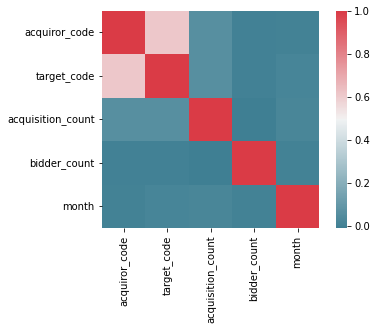

In [443]:
X_big = data_big.drop(columns=['car_1', 'car_3', 'car_5', 'car_10'])
corr = X_big.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True);

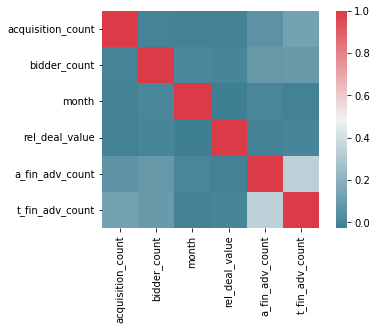

In [444]:
X_detailed = data_detailed.drop(columns=['car_1', 'car_3', 'car_5', 'car_10'])
corr = X_detailed.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True);

## Backward selection

### model_big_1

In [445]:
p_values = model_big_1.pvalues
p_values[p_values > 0.5]

# Observations:
# economic and business sector of target
# month of acuqisition

C(relatedness)[T.economic_sector]                                               0.922974
C(business_sector_ac)[T.Cyclical Consumer Products]                             0.879762
C(business_sector_ac)[T.Cyclical Consumer Services]                             0.625289
C(business_sector_ac)[T.Food & Beverages]                                       0.927161
C(business_sector_ac)[T.Transportation]                                         0.773619
C(economic_sector_target)[T.Basic Materials]                                    0.863821
C(economic_sector_target)[T.Consumer Cyclicals]                                 0.957053
C(economic_sector_target)[T.Consumer Non-Cyclicals]                             0.691766
C(economic_sector_target)[T.Financials]                                         0.933548
C(economic_sector_target)[T.Healthcare]                                         0.826194
C(economic_sector_target)[T.Industrials]                                        0.972314
C(economic_sector_tar

In [446]:
try_1 = smf.ols(
    formula='car_1 ~ C(consideration_offered) + C(shares_acquired) + C(shares_at_announcement) + C(target_status) + acquisition_count + bidder_count + C(cross_border) + C(relatedness) + C(economic_sector_ac) + C(business_sector_ac)',
    data=car_1_big
).fit()
print('model_big_1 R-squared improved:', try_1.rsquared)

# New p-values to be removed
p_values = try_1.pvalues
p_values[p_values > 0.5]

model_big_1 R-squared improved: 0.007244898373960917


C(relatedness)[T.economic_sector]                        0.829227
C(business_sector_ac)[T.Consumer Goods Conglomerates]    0.535319
C(business_sector_ac)[T.Cyclical Consumer Products]      0.804949
C(business_sector_ac)[T.Cyclical Consumer Services]      0.842371
C(business_sector_ac)[T.Food & Beverages]                0.776178
C(business_sector_ac)[T.Renewable Energy]                0.683852
C(business_sector_ac)[T.Transportation]                  0.721784
C(business_sector_ac)[T.Uranium]                         0.942792
acquisition_count                                        0.557186
dtype: float64

In [477]:
try_2 = smf.ols(
    formula='car_1 ~ C(consideration_offered) + C(shares_acquired) + C(shares_at_announcement) + C(target_status) + acquisition_count + bidder_count + C(cross_border) + C(relatedness) + C(economic_sector_ac)',
    data=car_1_big
).fit()
print('model_big_1 R-squared improved:', try_2.rsquared)

# New p-values to be removed
p_values = try_2.pvalues
p_values[p_values < 0.05]

model_big_1 R-squared improved: 0.00440361103978093


Intercept                                          0.007642
C(consideration_offered)[T.Other]                  0.000290
C(target_status)[T.public]                         0.003081
C(cross_border)[T.national]                        0.000286
C(economic_sector_ac)[T.Consumer Non-Cyclicals]    0.021538
C(economic_sector_ac)[T.Energy]                    0.045735
C(economic_sector_ac)[T.Financials]                0.037532
C(economic_sector_ac)[T.Healthcare]                0.031450
C(economic_sector_ac)[T.Real Estate]               0.007843
C(economic_sector_ac)[T.Technology]                0.041637
dtype: float64

In [478]:
try_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  car_1   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.406
Date:                Thu, 16 Sep 2021   Prob (F-statistic):           2.09e-07
Time:                        12:06:14   Log-Likelihood:                 26232.
No. Observations:               16192   AIC:                        -5.242e+04
Df Residuals:                   16170   BIC:                        -5.225e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                           0.0232      0.009      2.668      0.008       0.006       0.040
C(consideration_offered)[T.Other]                  -0.0030      0.001     -3.625      0.000      -0.005      -0.001
C(shares_acquired)[T.not_full]                      0.0028      0.002      1.772      0.076      -0.000       0.006
C(shares_at_announcement)[T.yes]                   -0.0027      0.003     -1.021      0.307      -0.008       0.002
C(target_status)[T.public]                         -0.0042      0.001     -2.960      0.003      -0.007      -0.001
C(cross_border)[T.national]                        -0.0034      0.001     -3.629      0.000      -0.005      -0.002
C(relatedness)[T.economic_sector]                  -0.0011      0.002     -0.533      0.594      -0.005       0.003
C(relatedness)[T.industry]                          0.0020      0.002      1.269      0.205      -0.001       0.005
C(relatedness)[T.industry_group]                    0.0023      0.002      1.251      0.211      -0.001       0.006
C(relatedness)[T.not_related]                       0.0011      0.002      0.732      0.464      -0.002       0.004
C(economic_sector_ac)[T.Basic Materials]           -0.0158      0.009     -1.798      0.072      -0.033       0.001
C(economic_sector_ac)[T.Consumer Cyclicals]        -0.0166      0.009     -1.907      0.057      -0.034       0.000
C(economic_sector_ac)[T.Consumer Non-Cyclicals]    -0.0202      0.009     -2.299      0.022      -0.037      -0.003
C(economic_sector_ac)[T.Energy]                    -0.0176      0.009     -1.998      0.046      -0.035      -0.000
C(economic_sector_ac)[T.Financials]                -0.0181      0.009     -2.080      0.038      -0.035      -0.001
C(economic_sector_ac)[T.Healthcare]                -0.0187      0.009     -2.152      0.031      -0.036      -0.002
C(economic_sector_ac)[T.Industrials]               -0.0158      0.009     -1.827      0.068      -0.033       0.001
C(economic_sector_ac)[T.Real Estate]               -0.0231      0.009     -2.659      0.008      -0.040      -0.006
C(economic_sector_ac)[T.Technology]                -0.0177      0.009     -2.037      0.042      -0.035      -0.001
C(economic_sector_ac)[T.Utilities]                 -0.0171      0.009     -1.849      0.064      -0.035       0.001
acquisition_count                                  -0.0007      0.000     -1.645      0.100      -0.001       0.000
bidder_count                                        0.0003      0.000      0.819      0.413      -0.000       0.001
==============================================================================
Omnibus:                     2932.630   Durbin-Watson:                   1.869
Prob(Omnibus):           

### model_detailed_1

In [448]:
p_values = model_detailed_1.pvalues
p_values[p_values > 0.5]

# Observations:
# business sector of target
# relatedness
# acquisition count
# financial advisors

Intercept                                                                       0.804844
C(shares_at_announcement)[T.yes]                                                0.714899
C(shares_acquired)[T.not_full]                                                  0.507355
C(consideration_offered)[T.Other]                                               0.707442
C(cross_border)[T.national]                                                     0.633812
C(relatedness)[T.economic_sector]                                               0.748054
C(relatedness)[T.industry]                                                      0.733689
C(relatedness)[T.industry_group]                                                0.735797
C(relatedness)[T.not_related]                                                   0.597992
C(business_sector_ac)[T.Cyclical Consumer Services]                             0.703165
C(business_sector_ac)[T.Food & Beverages]                                       0.842862
C(business_sector_ac)

In [479]:
try_1 = smf.ols(
    formula='car_1 ~ C(target_status) + C(shares_at_announcement) + C(shares_acquired) + C(consideration_offered) + bidder_count + month + rel_deal_value + C(economic_sector_ac) + C(business_sector_ac) + C(economic_sector_target) + C(cluster_category)',
    data=car_1_detailed
).fit()
print('model_detailed_1 R-squared improved:', try_1.rsquared)

# New p-values to be removed
p_values = try_1.pvalues
p_values[p_values < 0.05]

model_detailed_1 R-squared improved: 0.04412933352983073


C(target_status)[T.public]                                           2.643191e-08
C(economic_sector_ac)[T.Basic Materials]                             4.059506e-03
C(economic_sector_ac)[T.Consumer Cyclicals]                          5.842999e-03
C(economic_sector_ac)[T.Consumer Non-Cyclicals]                      2.905499e-03
C(economic_sector_ac)[T.Energy]                                      2.912380e-02
C(economic_sector_ac)[T.Financials]                                  4.618299e-03
C(economic_sector_ac)[T.Healthcare]                                  1.318240e-02
C(economic_sector_ac)[T.Industrials]                                 6.455562e-03
C(economic_sector_ac)[T.Real Estate]                                 2.056708e-03
C(economic_sector_ac)[T.Technology]                                  2.768002e-03
C(economic_sector_ac)[T.Utilities]                                   8.557777e-03
C(business_sector_ac)[T.Applied Resources]                           7.088198e-03
C(business_secto

In [480]:
try_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  car_1   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     2.662
Date:                Thu, 16 Sep 2021   Prob (F-statistic):           2.33e-09
Time:                        12:09:24   Log-Likelihood:                 4665.1
No. Observations:                2993   AIC:                            -9226.
Df Residuals:                    2941   BIC:                            -8914.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================================
                                                                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                             0.0261      0.059      0.440      0.660      -0.090       0.142
C(target_status)[T.public]                                           -0.0142      0.003     -5.579      0.000      -0.019      -0.009
C(shares_at_announcement)[T.yes]                                     -0.0028      0.006     -0.468      0.640      -0.015       0.009
C(shares_acquired)[T.not_full]                                        0.0027      0.004      0.611      0.541      -0.006       0.012
C(consideration_offered)[T.Other]                                    -0.0003      0.002     -0.139      0.889      -0.005       0.004
C(economic_sector_ac)[T.Basic Materials]                             -0.0796      0.028     -2.876      0.004      -0.134      -0.025
C(economic_sector_ac)[T.Consumer Cyclicals]                          -0.0810      0.029     -2.758      0.006      -0.139      -0.023
C(economic_sector_ac)[T.Consumer Non-Cyclicals]                      -0.0883      0.030     -2.980      0.003      -0.146      -0.030
C(economic_sector_ac)[T.Energy]                                      -0.0644      0.029     -2.183      0.029      -0.122      -0.007
C(economic_sector_ac)[T.Financials]                                  -0.0842      0.030     -2.835      0.005      -0.142      -0.026
C(economic_sector_ac)[T.Healthcare]                                  -0.0609      0.025     -2.480      0.013      -0.109      -0.013
C(economic_sector_ac)[T.Industrials]                                 -0.0748      0.027     -2.726      0.006      -0.129      -0.021
C(economic_sector_ac)[T.Real Estate]                                 -0.0566      0.018     -3.085      0.002      -0.093      -0.021
C(economic_sector_ac)[T.Technology]                                  -0.0820      0.027     -2.995      0.003      -0.136      -0.028
C(economic_sector_ac)[T.Utilities]                                   -0.0498      0.019     -2.631      0.009      -0.087      -0.013
C(business_sector_ac)[T.Applied Resources]                           -0.0295      0.011     -2.695      0.007      -0.051      -0.008
C(business_sector_ac)[T.Automobiles & Auto Parts]                    -0.0322      0.010     -3.200      0.001      -0.052      -0.012
C(business_sector_ac)[T.Banking & Investment Services]               -0.0230      0.009     -2.471      0.014      -0.041      -0.005
C(business_sector_ac)[T.Chemicals]                                   -0.0192      0.011     -1.806      0.071      -0.040       0.002
C(business_sector_ac)[T.Collective Investments]                      -0.0602      0.015     -4.086      0.000      -0.089      -0.031
C

# Filtering

In [450]:
industries = ['Financials', 'Technology', 'Healthcare', 'Energy']

## Economic sectors

In [458]:
# Big dataset

for industry in industries:
    # Setting temporary df
    data = car_1_big[car_1_big.economic_sector_ac == industry]
    print(industry)
    # Printing number of observations per industry
    print(len(data))
    # Build model
    model = smf.ols(
        formula='car_1 ~ C(consideration_offered) + C(shares_acquired) + C(shares_at_announcement) + C(target_status) + acquisition_count + bidder_count + month + C(cross_border) + C(relatedness) + C(business_sector_ac) + C(economic_sector_target) + C(business_sector_target)',
        data=data
    ).fit()
    # Printing r2 of model per industry
    print(model.rsquared)
    print('------------------')

Financials
2767
0.0300673213027135
------------------
Technology
2863
0.025958548929330805
------------------
Healthcare
1651
0.057146725598066994
------------------
Energy
747
0.058255951197880296
------------------


In [457]:
# Detailed dataset

for industry in industries:
    # Setting temporary df
    data = car_1_detailed[car_1_detailed.economic_sector_ac == industry]
    print(industry)
    # Printing number of observations per industry
    print(len(data))
    # Build model
    model = smf.ols(
        formula='car_1 ~ C(consideration_offered) + C(shares_acquired) + C(shares_at_announcement) + C(target_status) + acquisition_count + bidder_count + month + C(cross_border) + C(relatedness) + C(business_sector_ac) + C(economic_sector_target) + C(business_sector_target)',
        data=data
    ).fit()
    # Printing r2 of model per industry
    print(model.rsquared)
    print('------------------')

Financials
653
0.08909284357281921
------------------
Technology
386
0.0826950024740839
------------------
Healthcare
306
0.07568356009595634
------------------
Energy
253
0.1122301519018325
------------------


In [453]:
# Setting up healthcare dataframe

healthcare = car_1_detailed[car_1_detailed.economic_sector_ac == 'Healthcare']

hc_model = smf.ols(
        formula='car_1 ~ C(consideration_offered) + C(shares_acquired) + C(shares_at_announcement) + C(target_status) + acquisition_count + bidder_count + month + C(cross_border) + C(relatedness) + C(business_sector_ac) + C(economic_sector_target) + C(business_sector_target)',
        data=healthcare
).fit()

print(hc_model.rsquared)

p_values = hc_model.pvalues
print(p_values[p_values < 0.05])

0.07568356009595634
C(business_sector_target)[T.Food & Beverages]    0.037127
dtype: float64


In [454]:
# Setting up energy dataframe

energy = car_1_detailed[car_1_detailed.economic_sector_ac == 'Energy']

energy_model = smf.ols(
        formula='car_1 ~ C(consideration_offered) + C(shares_acquired) + C(shares_at_announcement) + C(target_status) + acquisition_count + bidder_count + month + C(cross_border) + C(relatedness) + C(business_sector_ac) + C(economic_sector_target) + C(business_sector_target)',
        data=energy
).fit()

print(energy_model.rsquared)

p_values = energy_model.pvalues
print(p_values[p_values < 0.05])

0.1122301519018325
C(target_status)[T.public]    0.000455
dtype: float64


## Big acquisitons

In [468]:
# Setting up filtered dataframe

big_acqu = car_1_detailed[car_1_detailed.rel_deal_value > 0.5]

print('number of observations:', len(big_acqu))

big_acqu_model = smf.ols(
    formula='car_1 ~ C(consideration_offered) + C(shares_acquired) + C(shares_at_announcement) + C(target_status) + acquisition_count + bidder_count + month + C(cross_border) + C(relatedness) + C(economic_sector_ac) + C(business_sector_ac) + C(economic_sector_target) + C(business_sector_target)',
    data=big_acqu
).fit()
print('----')
print('r2:', big_acqu_model.rsquared)
print('----')
print('p-values:')
p_values = big_acqu_model.pvalues
print(p_values[p_values < 0.05])
print('----')
big_acqu_model.summary()

number of observations: 327
----
r2: 0.24916285357187296
----
p-values:
C(target_status)[T.public]                                   0.000723
C(cross_border)[T.national]                                  0.033117
C(relatedness)[T.industry]                                   0.045297
C(relatedness)[T.industry_group]                             0.007641
C(relatedness)[T.not_related]                                0.004055
C(business_sector_ac)[T.Healthcare Services & Equipment]     0.036191
C(business_sector_ac)[T.Industrial & Commercial Services]    0.023321
C(business_sector_ac)[T.Industrial Goods]                    0.017035
C(business_sector_ac)[T.Mineral Resources]                   0.018341
C(business_sector_ac)[T.Technology Equipment]                0.042949
dtype: float64
----


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  car_1   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     1.442
Date:                Thu, 16 Sep 2021   Prob (F-statistic):             0.0269
Time:                        11:59:31   Log-Likelihood:                 393.34
No. Observations:                 327   AIC:                            -662.7
Df Residuals:                     265   BIC:                            -427.7
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
================================================================================================================================================
                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                        0.1167      0.084      1.387      0.167      -0.049       0.282
C(consideration_offered)[T.Other]                                                0.0061      0.012      0.492      0.623      -0.018       0.030
C(shares_acquired)[T.not_full]                                                   0.0080      0.039      0.205      0.837      -0.069       0.085
C(shares_at_announcement)[T.yes]                                                -0.0337      0.047     -0.712      0.477      -0.127       0.060
C(target_status)[T.public]                                                      -0.0385      0.011     -3.421      0.001      -0.061      -0.016
C(cross_border)[T.national]                                                      0.0314      0.015      2.142      0.033       0.003       0.060
C(relatedness)[T.economic_sector]                                                0.0098      0.026      0.374      0.709      -0.042       0.061
C(relatedness)[T.industry]                                                       0.0368      0.018      2.011      0.045       0.001       0.073
C(relatedness)[T.industry_group]                                                 0.0618      0.023      2.688      0.008       0.017       0.107
C(relatedness)[T.not_related]                                                    0.0655      0.023      2.899      0.004       0.021       0.110
C(economic_sector_ac)[T.Basic Materials]                                        -0.1624      0.084     -1.935      0.054      -0.328       0.003
C(economic_sector_ac)[T.Consumer Cyclicals]                                     -0.1310      0.097     -1.353      0.177      -0.322       0.060
C(economic_sector_ac)[T.Consumer Non-Cyclicals]                                 -0.1615      0.095     -1.704      0.090      -0.348       0.025
C(economic_sector_ac)[T.Energy]                                                 -0.1166      0.084     -1.385      0.167      -0.282       0.049
C(economic_sector_ac)[T.Financials]                                             -0.1718      0.098     -1.757      0.080      -0.364       0.021
C(economic_sector_ac)[T.Healthcare]                                             -0.1269      0.081     -1.575      0.116      -0.286       0.032
C(economic_sector_ac)[T.Industrials]                                            -0.0957      0.090     -1.057      0.291      -0.274       0.082
C(economic_sector_ac)[T.Real Estate]                                            -0.1177      0.062     -1.889      0.060      -0.240       0.005
C(economic_sector_ac)[T.Technology]   

## Public targets

In [484]:
# Setting up filtered dataframe

public = car_1_detailed[car_1_detailed.target_status == 'public']

print('number of observations:', len(public))

public_model = smf.ols(
    formula='car_1 ~ C(consideration_offered) + C(shares_acquired) + C(shares_at_announcement) + C(target_status) + acquisition_count + bidder_count + month + C(cross_border) + C(relatedness) + C(economic_sector_ac) + C(business_sector_ac) + C(economic_sector_target) + C(business_sector_target)',
    data=public
).fit()
print('----')
print('r2:', public_model.rsquared)
print('----')
print('p-values:')
p_values = public_model.pvalues
print(p_values[p_values < 0.05])
print('----')
public_model.summary()

number of observations: 763
----
r2: 0.12419861705893409
----
p-values:
C(consideration_offered)[T.Other]                                0.008257
C(business_sector_ac)[T.Automobiles & Auto Parts]                0.045711
C(business_sector_ac)[T.Food & Drug Retailing]                   0.048780
C(business_sector_target)[T.Industrial & Commercial Services]    0.018398
bidder_count                                                     0.046730
dtype: float64
----


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  car_1   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     1.630
Date:                Thu, 16 Sep 2021   Prob (F-statistic):            0.00240
Time:                        12:25:22   Log-Likelihood:                 1238.5
No. Observations:                 763   AIC:                            -2353.
Df Residuals:                     701   BIC:                            -2065.
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                 0.0318      0.022      1.461      0.144      -0.011       0.074
C(consideration_offered)[T.Other]                                        -0.0144      0.005     -2.649      0.008      -0.025      -0.004
C(shares_acquired)[T.not_full]                                            0.0128      0.007      1.765      0.078      -0.001       0.027
C(shares_at_announcement)[T.yes]                                         -0.0022      0.010     -0.227      0.821      -0.021       0.017
C(cross_border)[T.national]                                              -0.0048      0.006     -0.794      0.427      -0.017       0.007
C(relatedness)[T.economic_sector]                                         0.0074      0.011      0.645      0.519      -0.015       0.030
C(relatedness)[T.industry]                                                0.0104      0.008      1.370      0.171      -0.005       0.025
C(relatedness)[T.industry_group]                                         -0.0017      0.010     -0.170      0.865      -0.022       0.018
C(relatedness)[T.not_related]                                             0.0088      0.010      0.911      0.363      -0.010       0.028
C(economic_sector_ac)[T.Consumer Cyclicals]                              -0.0150      0.035     -0.432      0.666      -0.083       0.053
C(economic_sector_ac)[T.Consumer Non-Cyclicals]                          -0.0501      0.036     -1.405      0.160      -0.120       0.020
C(economic_sector_ac)[T.Energy]                                          -0.0147      0.035     -0.424      0.672      -0.083       0.053
C(economic_sector_ac)[T.Financials]                                      -0.0534      0.033     -1.608      0.108      -0.119       0.012
C(economic_sector_ac)[T.Healthcare]                                      -0.0192      0.029     -0.655      0.513      -0.077       0.038
C(economic_sector_ac)[T.Industrials]                                     -0.0285      0.033     -0.869      0.385      -0.093       0.036
C(economic_sector_ac)[T.Real Estate]                                     -0.0111      0.022     -0.498      0.618      -0.055       0.033
C(economic_sector_ac)[T.Technology]                                      -0.0182      0.032     -0.560      0.576      -0.082       0.046
C(economic_sector_ac)[T.Utilities]                                       -0.0090      0.026     -0.351      0.726      -0.060       0.041
C(business_sector_ac)[T.Automobiles & Auto Parts]                        -0.0461      0.023     -2.002      0.046      -0.091      -0.001
C(business_sector_ac)[T.Banking & Investment Se